In [1]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# reading the data

df=pd.read_csv(r"C:\Users\Admin\Downloads\titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### feature engineering

In [3]:
# handling missing values
# age column has 20% of missing values, cabin column has 77% of missing values and Embarked column has 0.2% of missing values
# since cabin feature has 77% of missing values the column has to be dropped
# will find the relation of age with other columns in order to treat the missing values

In [4]:
df.drop('Cabin',axis=1,inplace=True)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


value counts of Survived feature
0    549
1    342
Name: Survived, dtype: int64
-----------------------------------


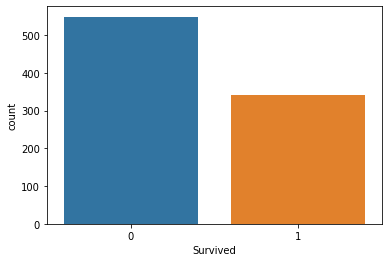

In [6]:
# now dealing with age column
# lets find the relation

print('value counts of Survived feature')
print(df['Survived'].value_counts())
print('-----------------------------------')
sns.countplot('Survived',data=df)

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64
-----------------------------------------------------------


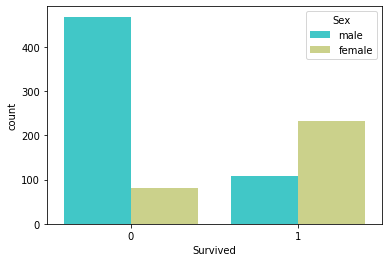

In [7]:
# find relation between sex and survived

print(df.groupby('Survived')['Sex'].value_counts())
print('-----------------------------------------------------------')
sns.countplot('Survived',data=df,hue='Sex',palette='rainbow')

In [8]:
# from the above we can say female survived more when compare to male

Survived  Pclass
0         3         372
          2          97
          1          80
1         1         136
          3         119
          2          87
Name: Pclass, dtype: int64
-----------------------------------------------------------


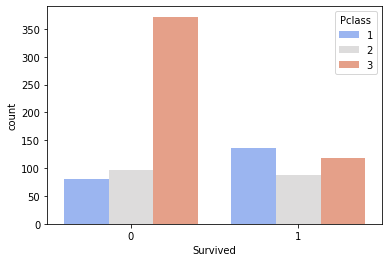

In [9]:
# relation of Survived v/s Pclass

print(df.groupby('Survived')['Pclass'].value_counts())
print('-----------------------------------------------------------')
sns.countplot('Survived',data=df,hue='Pclass',palette='coolwarm')

In [10]:
# people in P3 classes died more when compare to other classes

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64
---------------------------------------------------


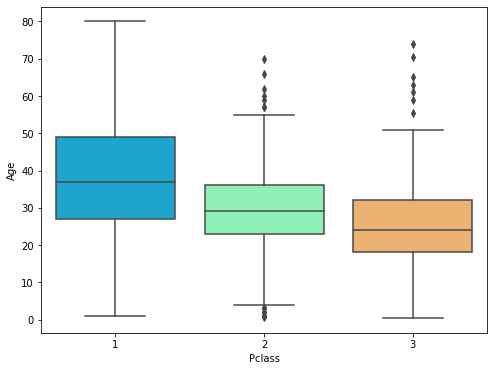

In [11]:
# relation between age and pclass

print(df.groupby('Pclass')['Age'].mean())
print('---------------------------------------------------')
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass',y='Age',data=df,palette='rainbow')

In [12]:
def age_imputation(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 30
        else:
            return 25
    else:
        return Age

In [13]:
df["Age"]=df[['Age','Pclass']].apply(age_imputation, axis=1)

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [15]:
# dealing with embarked column
df['Embarked'].mode()

0    S
dtype: object

In [16]:
df.fillna('S',inplace=True)

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
# dealing with outliers
# the continous numerical variables Age and Fare column has outliers

df['Age'].describe()

count    891.000000
mean      29.265062
std       13.212184
min        0.420000
25%       22.000000
50%       26.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [19]:
IQR=df['Age'].quantile(0.75)-df['Age'].quantile(0.25)
IQR

15.0

In [20]:
lower_quartile=df['Age'].quantile(0.25)-(IQR*1.5)
upper_quartile=df['Age'].quantile(0.75)+(IQR*1.5)

In [21]:
lower_quartile,upper_quartile

(-0.5, 59.5)

In [22]:
df[df['Age']>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,S


In [23]:
# Capping

df.loc[df.Age>59,'Age']=59

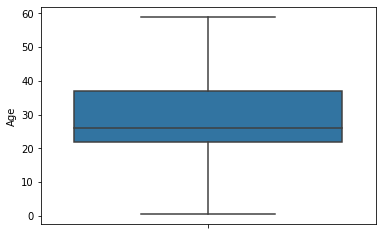

In [24]:
# Visualization
sns.boxplot(df['Age'],orient='v')

In [25]:
# no outliers in age column

In [26]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [27]:
# dealing on outliers with fare column

IQR=df.Fare.quantile(0.75)-df['Fare'].quantile(0.25)

upper_boundary=df['Fare'].quantile(0.75)+(IQR*1.5)
lower_boundary=df['Fare'].quantile(0.25)-(IQR*1.5)

IQR,upper_boundary,lower_boundary

(23.0896, 65.6344, -26.724)

In [28]:
df.loc[df['Fare']>65,'Fare']=65

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.000,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,S


In [30]:
# dealing with categorical variables

cat_feature=[feature for feature in df.columns if df[feature].dtypes=="O"]

In [31]:
cat_feature

['Name', 'Sex', 'Ticket', 'Embarked']

In [32]:
df['Name'].nunique()

891

In [33]:
# Each row different values in name column hence have to drop from the data

df.drop('Name',axis=1,inplace=True)

In [34]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.250,S
1,2,1,1,female,38.0,1,0,PC 17599,65.000,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.925,S
3,4,1,1,female,35.0,1,0,113803,53.100,S
4,5,0,3,male,35.0,0,0,373450,8.050,S


In [35]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [36]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [37]:
df['Ticket'].nunique()

681

In [38]:
A=pd.get_dummies(df[['Embarked','Sex']],drop_first=True)

In [39]:
# the Ticket column has more than 600 unique values hence converting into dummy variables will lead to more column 
# Hence we have drop the ticket column

df.drop('Ticket',axis=1,inplace=True)

In [40]:
df.drop(['Sex','Embarked','PassengerId'],axis=1,inplace=True)

In [41]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.250
1,1,1,38.0,1,0,65.000
2,1,3,26.0,0,0,7.925
3,1,1,35.0,1,0,53.100
4,0,3,35.0,0,0,8.050


In [42]:
Dataset=pd.concat([df,A],axis=1)

### Model building

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [47]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size=0.30,random_state=10)

In [48]:
# logistic regression

logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\Admin\anaconda new\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
predictions=logmodel.predict(x_test)

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [52]:
cm=confusion_matrix(y_test,predictions)

In [56]:
cm

array([[156,  18],
       [ 46,  48]], dtype=int64)

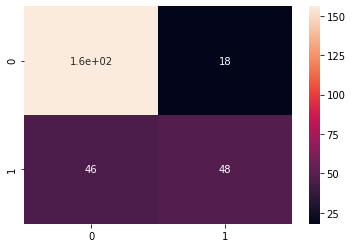

In [55]:
sns.heatmap(cm,annot=True)

In [57]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       174
           1       0.73      0.51      0.60        94

    accuracy                           0.76       268
   macro avg       0.75      0.70      0.71       268
weighted avg       0.76      0.76      0.75       268



In [58]:
# decision tree

DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [59]:
treepredict=DT.predict(x_test)

In [65]:
CM=confusion_matrix(y_test,treepredict)
CM

array([[128,  46],
       [ 47,  47]], dtype=int64)

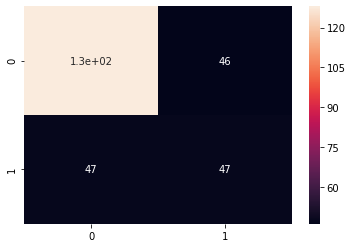

In [64]:
sns.heatmap(CM,annot=True)

In [66]:
print(classification_report(y_test,treepredict))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73       174
           1       0.51      0.50      0.50        94

    accuracy                           0.65       268
   macro avg       0.62      0.62      0.62       268
weighted avg       0.65      0.65      0.65       268



In [67]:
rf = RandomForestClassifier(n_estimators=10)
model_rf = rf.fit(x_train,y_train)
y_pred = model_rf.predict(x_test)

In [69]:
Cm=confusion_matrix(y_test,y_pred)
cm

array([[156,  18],
       [ 46,  48]], dtype=int64)

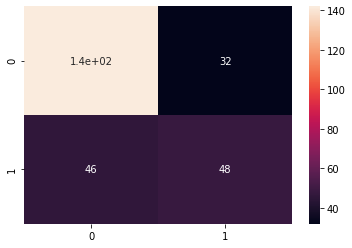

In [70]:
sns.heatmap(Cm,annot=True)

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.78       174
           1       0.60      0.51      0.55        94

    accuracy                           0.71       268
   macro avg       0.68      0.66      0.67       268
weighted avg       0.70      0.71      0.70       268



In [ ]:
# logistic regression is performing better when compare to decision tree and randomforest